## 線形回帰モデルの比較
## (sklearnライブラリ vs 手動)

### ■ 予測関数

線形回帰モデルの予測関数：

$$
f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b
$$

ここで：

- $\mathbf{x}$：入力特徴ベクトル  
- $\mathbf{w}$：重みベクトル  
- $b$：バイアス  

---

### ■ コスト関数

損失関数には、平均二乗誤差（MSE）の 1/2 倍を用いる：

$$
J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2
$$

- $m$：データ数  
- $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$：i番目の予測値  
- $y^{(i)}$：i番目の正解値

---

### ■ 勾配（偏微分）

重み $w_j$ およびバイアス $b$ に対する勾配：

$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)
$$

---



In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import time

Iteration 0: Cost 69584.1187
Iteration 100: Cost 9927.7868
Iteration 200: Cost 1875.0641
Iteration 300: Cost 624.7918
Iteration 400: Cost 368.0897
Iteration 500: Cost 287.9828
Iteration 600: Cost 253.7661
Iteration 700: Cost 237.1009
Iteration 800: Cost 228.6487
Iteration 900: Cost 224.3130
プログラムの実行時間: 0.0200 秒


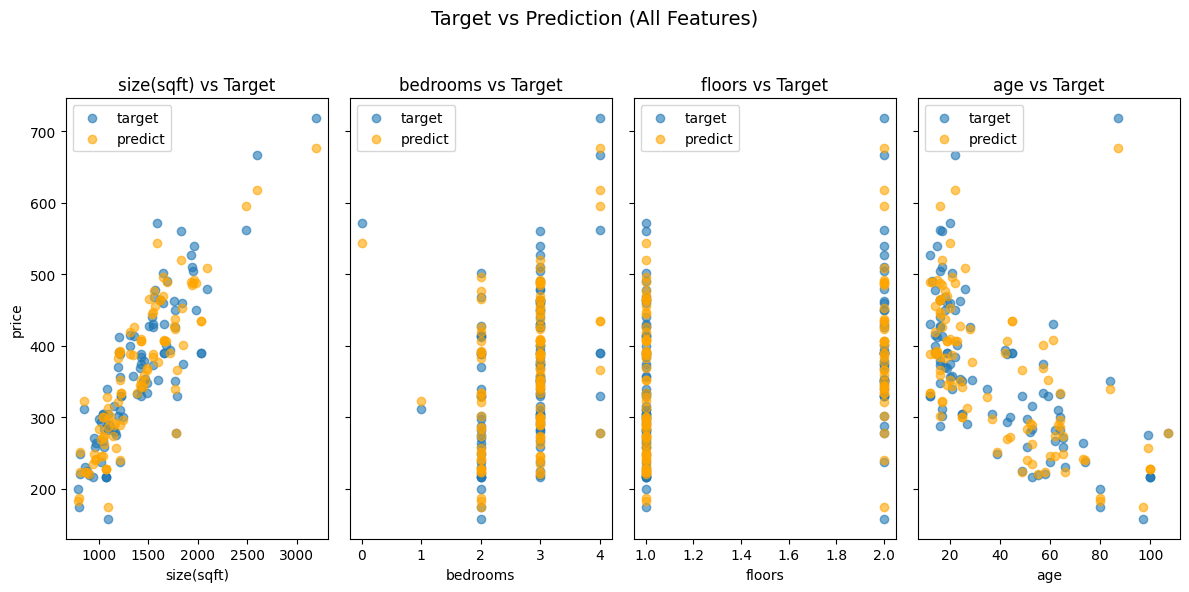

In [2]:
# 線形回帰モデルの実装(手動)
# 実行前の時刻を取得
start_time = time.time()

# データ読み込み
data = pd.read_csv("../datasets/houses.txt")
#多次元計算ndarray([],[],[])
X_train = data.iloc[:, :-1].values  # (n_samples, n_features)
y_train = data.iloc[:, -1].values   # (n_samples,)

# 特徴量名とターゲット名
X_features = data.columns[:-1].tolist()
y_target = data.columns[-1]

# 特徴量のZスコア標準化（平均0、分散1）　axisで列指定
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_norm = (X_train - X_mean) / X_std

# ハイパーパラメータ
alpha = 0.01     # 学習率
iterations = 1000
m, n = X_norm.shape

# パラメータ初期化
w = np.zeros(n)
b = 0.0

# コスト関数
def compute_cost(X, y, w, b):
    preds = X.dot(w) + b
    cost = (1 / (2 * len(y))) * np.sum((preds - y) ** 2)
    return cost

# 勾配計算
def compute_gradient(X, y, w, b):
    m = len(y)
    preds = X.dot(w) + b
    errors = preds - y
    dj_dw = (1/m) * X.T.dot(errors)
    dj_db = (1/m) * np.sum(errors)
    return dj_dw, dj_db

# 勾配降下法ループ
for i in range(iterations):
    dj_dw, dj_db = compute_gradient(X_norm, y_train, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db

    if i % (iterations // 10) == 0:
        cost = compute_cost(X_norm, y_train, w, b)
        print(f"Iteration {i}: Cost {cost:.4f}")

# 予測
target = X_norm.dot(w) + b

end_time = time.time()
execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time:.4f} 秒")

# 結果出力
n_rows, n_cols = 1, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6), sharey=True)
axes = np.array(axes).reshape(-1)

for i, ax in enumerate(axes):
    ax.scatter(X_train[:, i], y_train, label='target', alpha=0.6)
    ax.scatter(X_train[:, i], target, color="#FFA500", label='predict', alpha=0.6)
    ax.set_xlabel(X_features[i])
    if i == 0:
        ax.set_ylabel(y_target)
    ax.legend()
    ax.set_title(f"{X_features[i]} vs Target")

fig.suptitle("Target vs Prediction (All Features)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


プログラムの実行時間: 0.0112 秒


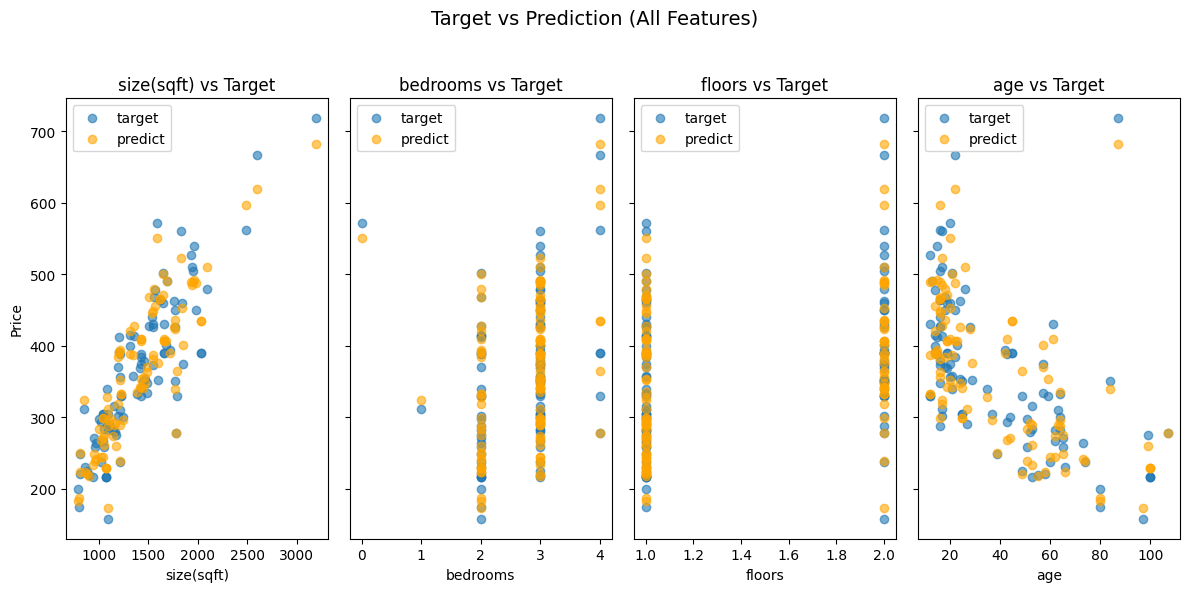

In [4]:
# 線形回帰モデルの実装(sklearn)
start_time = time.time()

#データ読み込みと前処理
data = pd.read_csv("../datasets/houses.txt")
X_train = data.iloc[:, :-1].values  # (n_samples, n_features)最後の列を除いた特徴量
y_train = data.iloc[:, -1].values   # （n_samples,）最後の列をターゲットとして

# 特徴量名とターゲット名を取得
all_columns = data.columns.tolist()
X_features = all_columns[:-1]
y_target = all_columns[-1]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train) #求めて(fit)正規化(transform)

#モデルの学習
model = SGDRegressor(
    max_iter=1000,
    random_state = 42
)

model.fit(X_norm, y_train)
b_norm = model.intercept_
w_norm = model.coef_

#モデル予測
target= model.predict(X_norm)

#sklearn実行時間
end_time = time.time()
execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time:.4f} 秒")

#結果出力
n_rows, n_cols = 1, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6), sharey=True)
axes = np.array(axes).reshape(-1)  # 次元合わせ（1次元でも対応）

for i, ax in enumerate(axes):
    ax.scatter(X_train[:, i], y_train, label='target', alpha=0.6)
    ax.scatter(X_train[:, i], target, color="#FFA500", label='predict', alpha=0.6)
    ax.set_xlabel(X_features[i]) # X軸ラベル設定
    if i == 0: # Y軸ラベルは一番左だけに表示（任意）
        ax.set_ylabel("Price")
    ax.legend()# subplotごとに凡例表示
    ax.set_title(f"{X_features[i]} vs Target")  # subplotのタイトルに変数を含める例

fig.suptitle("Target vs Prediction (All Features)", fontsize=14) # 全体タイトル
plt.tight_layout(rect=[0, 0, 1, 0.95])  # タイトルが被らないよう調整
plt.show()

In [5]:
print("b_normの形:", b_norm.shape)
print("b_normの中身:", b_norm)
print("w_normの形:", w_norm.shape)
print("w_normの中身:", w_norm)

b_normの形: (1,)
b_normの中身: [362.24255738]
w_normの形: (4,)
w_normの中身: [109.84733119 -21.07797534 -32.26154151 -37.92509469]
